**CLASS**

**2020_Book_IntroductionToScientificProgra.pdf** s 115

Bu bölümde, programlamada temel bir kavram olan sınıfları tanıtacağız. Çoğu modern programlama dili sınıfları veya benzer kavramları destekler ve bu kitapta daha önce sınıflarla karşılaşmıştık. Örneğin, Bölüm 2'de bir değişkenin türünü tür fonksiyonuyla nasıl kontrol edebileceğimizi ve çıktının <class 'int'>, <class 'float'> vb. biçiminde olacağını hatırlayın. Bu, basitçe bir nesnenin türünün bir sınıf biçiminde tanımlandığını belirtir. Örneğin, programımızda bir tamsayı değişkeni her oluşturduğumuzda, int sınıfının bir nesnesini veya örneğini oluştururuz. Sınıf, nesnelerin nasıl davrandığını ve hangi yöntemleri içerdiğini tanımlar. Liste nesneleri için append yöntemi ve dizeler için split yöntemi gibi nesnelere bağlı çok sayıda farklı yöntem kullandık. Bu tür tüm yöntemler, nesnenin ait olduğu sınıfın tanımının bir parçasıdır. Şimdiye kadar, nesneleri oluşturmak için yalnızca Python'un yerleşik sınıflarını kullandık, ancak bu bölümde kendi sınıflarımızı yazacağız ve bunları belirli ihtiyaçlarımıza göre uyarlanmış nesneler oluşturmak için kullanacağız.


**Sınıfların Temelleri**

Bir sınıf, verileri ve işlevleri tek bir birimde bir araya getirir. Önceki bölümlerde görüldüğü gibi, bir sınıfa veya nesneye bağlı işlevlere genellikle yöntem denir ve bu bölümde bu gösterime bağlı kalacağız. Sınıflar, doğal olarak birbirine ait olan değişken ve işlev koleksiyonları olan modüllerle bazı benzerliklere sahiptir. Ancak, bir modülün yalnızca tek bir örneği olabilirken, bir sınıfın birden fazla örneğini oluşturabiliriz. Aynı sınıfın farklı örnekleri farklı veriler içerebilir, ancak hepsi aynı şekilde davranır ve aynı yöntemlere sahiptir. int gibi temel bir Python sınıfını düşünün; bir programda birçok tamsayı değişkeni oluşturabiliriz ve bunların açıkça farklı değerleri (verileri) vardır, ancak hepsinin aynı genel davranışa ve onlar için tanımlanmış aynı işlem kümesine sahip olduğunu biliyoruz. Aynısı listeler ve dizeler gibi daha karmaşık Python sınıfları için de geçerlidir; farklı nesneler farklı veriler içerir, ancak hepsi aynı yöntemlere sahiptir. Bu bölümde oluşturduğumuz sınıflar tam olarak aynı şekilde davranır.

**İlk örnek: Bir fonksiyonu temsil eden bir sınıf.**

Tanıdık bir örnekle başlamak için, atmosfer basıncını p'yi irtifa h'nin bir fonksiyonu olarak hesaplayan formüle geri dönüyoruz. Kullandığımız formül, aşağıdaki şekilde verilen daha genel bir barometrik formülün basitleştirilmiş halidir:


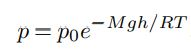

Burada M havanın mol kütlesi, g yer çekimi sabiti, R gaz sabiti, T sıcaklık ve p0 deniz seviyesindeki basınçtır.Daha önce kullanılan daha basit formülü, ölçek yüksekliğini h0 = RT/Mg olarak tanımlayarak elde ederiz. Yukarıdaki eşitliği farklı sıcaklıklar için değerlendirmek ve her T değeri için basıncın irtifaya göre nasıl değiştiğini gösteren bir tablo veya grafik oluşturmak ilginç olabilir. Her T değeri için, h'nin farklı değerleriyle fonksiyonu birçok kez çağırmamız gerekir. Bunu uygun bir şekilde nasıl uygulamalıyız? Olası bir çözüm, hem h hem de T'yi argüman olarak kullanmaktır:

In [12]:
from math import exp
def barometric(h, T):
    g = 9.81 #m/(s*s)
    R = 8.314 #J/(K*mol)
    M = 0.02896 #kg/mol
    p0 = 100.0 #kPa
    return p0 * exp(-M*g*h/(R*T))

Bu çözüm açıkça işe yarıyor, ancak fonksiyonu aynı T değeri için birçok kez çağırmak istiyorsak, her çağrıldığında onu yine de bir argüman olarak geçirmemiz gerekiyor. Ancak, fonksiyon yalnızca tek bir argüman almasını bekleyen başka bir fonksiyona argüman olarak geçirilecekse ne olur? Bu durumda, iki argümanlı fonksiyonumuz çalışmayacaktır. Kısmi bir çözüm, T argümanı için varsayılan bir değer eklemek olurdu, ancak farklı bir T değeri istiyorsak yine de bir sorun yaşardık.

Başka bir çözüm ise h'yi tek argüman, T'yi ise global değişken olarak kullanmak olabilir:

In [1]:
T = 245.0
def barometric(h):
    g = 9.81 #m/(s*s)
    R = 8.314 #J/(K*mol)
    M = 0.02896 #kg/mol
    p0 = 100.0 #kPa
    return p0 * exp(-M*g*h/(R*T))

Şimdi tek bir argüman alan bir fonksiyonumuz var, ancak T'yi küresel bir değişken olarak tanımlamak, y(t)'yi farklı T değerleri için değerlendirmek istiyorsak çok kullanışlı değil. Ayrıca T'yi fonksiyon içinde yerel bir değişken olarak ayarlayabilir ve farklı T değerleri için barometric1(h), barometric2(h) vb. gibi farklı fonksiyonlar tanımlayabiliriz, ancak bu, T'nin birçok değerini istiyorsak açıkça elverişsizdir. Ancak, sınıflar ve nesnelerle programlamanın tam olarak ihtiyacımız olan şeyi sunduğunu göreceğiz: Hepsi kendi T değerine sahip benzer fonksiyonlardan oluşan bir aile oluşturmak için kullanışlı bir çözüm.

In [ ]:
class Barometric:
    def __init__(self, T):
        self.T = T #K
        self.g = 9.81 #m/(s*s)
        self.R = 8.314 #J/(K*mol)
        self.M = 0.02896 #kg/mol
        self.p0 = 100.0 #kPa
    def value(self, h):
        return self.p0 * exp(-self.M*self.g*h/(self.R*self.T))

Bu sınıfı tanımladıktan sonra, T parametresinin belirli değerlerine sahip sınıfın örneklerini oluşturabiliriz ve daha sonra h'yi tek argüman olarak kullanarak value metodunu çağırabiliriz:

In [ ]:
b1 = Barometric(T=245) # create instance (object)
p1 = b1.value(2469) # compute function value
b2 = Barometric(T=273)
p2 = b2.value(2469)

Bu kod parçaları, incelemeye değer bir dizi yeni kavram sunar. Öncelikle, Python'da her zaman sınıf kelimesiyle başlayan, ardından sınıfın adı ve iki nokta üst üste gelen bir sınıf tanımımız var. Aşağıdaki girintili kod bloğu, sınıfın içeriğini tanımlar. Fonksiyonları uygularken alıştığımız gibi, girinti, sınıf tanımının içinde neyin yer aldığını tanımlar. Sınıfımızın ve çoğu sınıfın ilk içeriği, sınıfın kurucusu olarak adlandırılan __init__ özel adlı bir yöntemdir. Bu yöntem, yukarıdaki b1 = Barometric(T=245) satırında olduğu gibi, sınıfta bir örnek oluşturduğumuz her seferinde otomatik olarak çağrılır.Yöntemin içerisinde formülde kullanılan tüm sabitleri tanımlıyoruz – self.T, self.g, vb. – burada self öneki, bu değişkenlerin oluşturulan nesneye bağlanacağı anlamına gelir. Bu tür bağlı değişkenlere öznitelikler denir. Son olarak, formülü önceden tanımlanmış ve nesneye bağlı self.T, self.g, self.R, self.M ve self.p0 parametrelerini kullanarak değerlendiren yöntem değerini tanımlarız. Sınıfı tanımladıktan sonra, her seferinde şu şekilde bir satır yazdığımızda

b1 = Barometric(T=245)

Barometric türünde yeni bir değişken (örnek) b1 oluşturuyoruz. Satır normal bir fonksiyon çağrısı gibi görünüyor, ancak Barometric bir sınıfın tanımı olduğundan ve bir fonksiyon olmadığından, Barometric(T=245) bunun yerine sınıfın kurucusuna bir çağrıdır.

Oluşturucu, belirtilen parametre değerlerine sahip sınıfın bir örneğini oluşturur ve döndürür ve bu örneği b değişkenine atarız. Bu kitapta karşılaştığımız tüm __init__ işlevleri tam olarak aynı tarifi izleyecektir. Amaçları sınıf için bir dizi öznitelik tanımlamaktır ve genellikle self.A = A biçiminde bir veya daha fazla satır içereceklerdir, burada A, oluşturucuya geçirilen bir argüman veya içinde tanımlanan bir değerdir.

Programlamada her zaman olduğu gibi, aynı şeyi başarmanın farklı yolları vardır ve yukarıdaki sınıfın farklı bir uygulamasını seçebilirdik. Oluşturucuya tek argüman T olduğundan, diğer nitelikler asla değişmez ve value metodunun içindeki yerel değişkenler olabilirlerdi:

In [ ]:
class Barometric1:
    def __init__(self, T):
        self.T = T #K
    def value(self, h):
        g = 9.81; R = 9.314
        M = 0.02896; p0 = 100.0
        return p0 * exp(-M*g*h/(R*self.T))

Değer yönteminin içinde, sınıf niteliği olan tek değişken olduğu için T için yalnızca self önekini kullandığımızı fark edin. Sınıfın bu sürümünde diğer değişkenler, yöntem içinde tanımlanan düzenli yerel değişkenlerdir. Bu sınıf, yukarıda tanımlanan sınıfla tam olarak aynı şeyi yapar ve bu uygulamanın daha iyi olduğu, çünkü yukarıdakinden daha kısa ve daha basit olduğu söylenebilir. Ancak, tüm fiziksel sabitleri tek bir yerde (oluşturucuda) tanımlamak, kodun okunmasını kolaylaştırabilir ve sınıfın daha fazla yöntemle genişletilmesini kolaylaştırabilir. Üçüncü olası uygulama olarak, hesaplamaların bir kısmını değer yönteminden oluşturucuya taşıyabiliriz:

In [ ]:
class Barometric2:
    def __init__(self, T):
        g = 9.81 #m/(s*s)
        R = 8.314 #J/(K*mol)
        M = 0.02896 #kg/mol
        self.h0 = R*T/(M*g)
        self.p0 = 100.0 #kPa
    def value(self, h):
        return self.p0 * exp(-h/self.h0)

Bu sınıfta, ölçek yüksekliğinin yukarıdaki tanımını kullanırız ve bu değeri oluşturucunun içinde bir öznitelik olarak hesaplayıp depolarız. Daha sonra self.h0 özniteliği value yönteminin içinde kullanılır. Bu durumda g, R ve M sabitlerinin oluşturucudaki yerel değişkenler olduğunu ve ne bunların ne de T'nin öznitelik olarak depolanmadığını fark edin. Bunlara yalnızca oluşturucunun içinde erişilebilirken, self.p0 ve self.h0 depolanır ve daha sonra diğer yöntemlerden erişilebilir.

Bu noktada, birçok kişi self değişkeni ve __init__ ve value yöntemlerini tanımladığımızda iki argüman almaları, ancak onları çağırdığımızda yalnızca bir argüman almaları gerçeğiyle karıştırılacaktır. Bu davranışın açıklaması, self'in nesnenin kendisini temsil etmesi ve nesneye bağlı bir yöntemi çağırdığımızda otomatik olarak ilk argüman olarak geçirilmesidir.

p1 = b1.value(2469) yazdığımızda p1 = Barometric.value(b1,2469) çağrısına eşdeğerdir.

Burada Barometric sınıfına ait olan değer yöntemini açıkça çağırıyoruz ve b1 örneğini ilk argüman olarak geçiriyoruz. Yöntemin içinde b1, bir fonksiyona argüman geçirirken her zamanki gibi yerel değişken self olur ve onun T, g vb. niteliklerine erişebiliriz. Aynı şey b1.value(2469) çağırdığımızda da olur, ancak şimdi b1 nesnesi otomatik olarak yönteme ilk argüman olarak geçirilir. Yöntemi tek bir argümanla çağırıyormuşuz gibi görünür, ancak gerçekte iki argüman alır.

Python sınıflarında self değişkeninin kullanımı birçok tartışmanın konusu olmuştur. Deneyimli programcılar bile bunu kafa karıştırıcı bulmaktadır ve birçoğu dilin neden bu şekilde tasarlandığını sorgulamıştır. Yaklaşımın bazı bariz avantajları vardır, örneğin, örnek nitelikleri (self önekiyle) ve bir yöntem içinde tanımlanan yerel değişkenler arasında çok açık bir şekilde ayrım yapar. Ancak, self değişkeninin arkasındaki mantığı anlamakta zorlanıyorsanız, aşağıdaki iki kuralı hatırlamak yeterlidir: (i) self her zaman bir yöntem tanımındaki ilk argümandır, ancak yöntem çağrıldığında asla eklenmez ve (ii) bir yöntem içindeki bir niteliğe erişmek için niteliğe self önekinin eklenmesi gerekir.

Barometrik fonksiyonumuz için bir sınıf oluşturmanın bir avantajı, artık tek bir argüman alan bir fonksiyon argümanı f bekleyen herhangi bir başka fonksiyona argüman olarak b1.value gönderebilmemizdir. Örneğin, make_table fonksiyonunun kendisine geçirilen herhangi bir fonksiyon için fonksiyon değerlerinin bir tablosunu yazdırdığı aşağıdaki küçük örneği ele alalım:



In [ ]:
from math import sin, exp, pi
from numpy import linspace

def make_table(f, tstop, n):
    for t in linspace(0, tstop, n):
        print(t, f(t))
def g(t):
    return sin(t)*exp(-t)
make_table(g, 2*pi, 11) # send ordinary function

b1 = Barometric(2469)
make_table(b1.value, 2*pi, 11) # send class method

f(t)'nin fonksiyon içinde nasıl kullanıldığı nedeniyle, make_table'a tek bir argüman alan bir fonksiyon göndermemiz gerekir. b1.value yöntemimiz bu gereksinimi karşılar, ancak yine de birden fazla örnek oluşturarak T'nin farklı değerlerini kullanabiliriz.

**Daha genel Python sınıfları**

Elbette, Python sınıfları matematiksel fonksiyonların gösteriminden çok daha genel uygulanabilirliğe sahiptir. Genel bir Python sınıf tanımı, yukarıdaki örnekte özetlenen tarifi şu şekilde takip eder:

In [ ]:
class MyClass:
    def __init__(self, p1, p2,...):
        self.attr1 = p1
        self.attr2 = p2
...
    def method1(self, arg):
    #access attributes with self prefix
        result = self.attr1 + ...
    ...
    #create new attributes if desired
    self.attrx = arg
    ...
    return result
    def method2(self):
    ...
    print(...)

Sınıfın içinde, argümanlarla veya argümansız istediğimiz kadar çok yöntem tanımlayabiliriz. Sınıfın bir örneğini oluşturduğumuzda, yöntemler örneğe bağlanır ve örneğin, m, MyClass'ın bir örneğiyse, m.method2() önekiyle erişilir. Niteliklerin başlatıldığı bir oluşturucuya sahip olmak yaygındır, ancak bu bir gereklilik değildir. Nitelikler istendiğinde tanımlanabilir, örneğin, yukarıdaki örnekte self.attrx = arg satırında olduğu gibi bir yöntemin içinde veya hatta sınıfın dışından:

m = MyClass(p1,p2, ...)

m.new_attr = p3

Buradaki ikinci satır, MyClass'ın m örneği için yeni bir new_attr niteliği oluşturur. Niteliklerin bu şekilde eklenmesi tamamen geçerlidir, ancak aynı sınıfın örneklerinin farklı niteliklere sahip olmasıyla sonuçlanabileceğimizden nadiren iyi bir programlama uygulamasıdır. Bir sınıfı her zaman bir oluşturucuyla donatmak ve nitelikleri öncelikle oluşturucunun içinde tanımlamak iyi bir alışkanlıktır.